In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [17]:
plt.style.use('fivethirtyeight')

In [18]:
# load data
df = pd.read_csv('BBRI.JK.csv')
df

Date    Open    High     Low   Close    Adj Close       Volume
0     2017-01-02  2335.0  2335.0  2335.0  2335.0  1827.484009          0.0
1     2017-01-03  2350.0  2380.0  2315.0  2380.0  1862.703735   67580500.0
2     2017-01-04  2380.0  2440.0  2350.0  2440.0  1909.662109   79891000.0
3     2017-01-05  2460.0  2465.0  2405.0  2420.0  1894.009155  145357000.0
4     2017-01-06  2420.0  2430.0  2395.0  2420.0  1894.009155   73241000.0
...          ...     ...     ...     ...     ...          ...          ...
1257  2021-12-24  4100.0  4120.0  4050.0  4070.0  3683.759521   59795000.0
1258  2021-12-27  4070.0  4110.0  4060.0  4060.0  3674.708496   65491200.0
1259  2021-12-28  4090.0  4110.0  4070.0  4090.0  3701.861572   52952500.0
1260  2021-12-29  4090.0  4100.0  4070.0  4080.0  3692.810547   27676500.0
1261  2021-12-30  4080.0  4140.0  4060.0  4110.0  3719.963623  146989400.0

[1262 rows x 7 columns]

In [19]:
# drop rows with missing values
df.dropna(inplace=True)

In [20]:
def split_data(df, train_size): 
  size = int(len(df) * train_size)
  train, test = df.iloc[0:size], df.iloc[size:len(df)]
  return train, test

train, test = split_data(df['Close'], 0.8) #80% Train

In [21]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train.values.reshape(-1,1))
test = scaler.transform(test.values.reshape(-1,1))

In [22]:
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
seq_length=60
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
model = Sequential([
    LSTM(128, input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2), 
    Dense(32),
    Dense(16),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              metrics=["mae"], 
              loss=tf.keras.losses.Huber())

early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

In [25]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 8s 332ms/step - loss: 0.0227 - mae: 0.1730 - val_loss: 0.0223 - val_mae: 0.2016
Epoch 2/1000
8/8 [==============================] - 2s 204ms/step - loss: 0.0113 - mae: 0.1223 - val_loss: 0.0059 - val_mae: 0.0965
Epoch 3/1000
8/8 [==============================] - 2s 226ms/step - loss: 0.0108 - mae: 0.1266 - val_loss: 0.0062 - val_mae: 0.0980
Epoch 4/1000
8/8 [==============================] - 2s 219ms/step - loss: 0.0080 - mae: 0.0982 - val_loss: 0.0016 - val_mae: 0.0441
Epoch 5/1000
8/8 [==============================] - 2s 207ms/step - loss: 0.0054 - mae: 0.0855 - val_loss: 0.0016 - val_mae: 0.0430
Epoch 6/1000
8/8 [==============================] - 2s 211ms/step - loss: 0.0048 - mae: 0.0764 - val_loss: 0.0016 - val_mae: 0.0429
Epoch 7/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.0035 - mae: 0.0631 - val_loss: 0.0014 - val_mae: 0.0403
Epoch 8/1000
8/8 [==============================] - 2s 234ms/step - loss: 0.

8/8 [==============================] - 2s 206ms/step - loss: 0.0013 - mae: 0.0385 - val_loss: 0.0012 - val_mae: 0.0376
Epoch 63/1000
8/8 [==============================] - 2s 203ms/step - loss: 0.0013 - mae: 0.0373 - val_loss: 0.0014 - val_mae: 0.0429
Epoch 64/1000
8/8 [==============================] - 2s 197ms/step - loss: 0.0014 - mae: 0.0394 - val_loss: 9.8126e-04 - val_mae: 0.0337
Epoch 65/1000
8/8 [==============================] - 2s 198ms/step - loss: 0.0014 - mae: 0.0418 - val_loss: 0.0017 - val_mae: 0.0479
Epoch 66/1000
8/8 [==============================] - 2s 204ms/step - loss: 0.0016 - mae: 0.0445 - val_loss: 0.0016 - val_mae: 0.0460
Epoch 67/1000
8/8 [==============================] - 2s 220ms/step - loss: 0.0016 - mae: 0.0435 - val_loss: 0.0023 - val_mae: 0.0581
Epoch 68/1000
8/8 [==============================] - 2s 203ms/step - loss: 0.0017 - mae: 0.0448 - val_loss: 0.0026 - val_mae: 0.0617
Epoch 69/1000
8/8 [==============================] - 2s 230ms/step - loss: 0.00

8/8 [==============================] - 2s 202ms/step - loss: 8.4311e-04 - mae: 0.0308 - val_loss: 7.3614e-04 - val_mae: 0.0291
Epoch 123/1000
8/8 [==============================] - 2s 210ms/step - loss: 9.0485e-04 - mae: 0.0311 - val_loss: 8.1215e-04 - val_mae: 0.0304
Epoch 124/1000
8/8 [==============================] - 2s 199ms/step - loss: 8.1491e-04 - mae: 0.0296 - val_loss: 6.6980e-04 - val_mae: 0.0274
Epoch 125/1000
8/8 [==============================] - 2s 200ms/step - loss: 9.3188e-04 - mae: 0.0323 - val_loss: 0.0011 - val_mae: 0.0382
Epoch 126/1000
8/8 [==============================] - 2s 208ms/step - loss: 0.0010 - mae: 0.0343 - val_loss: 8.6661e-04 - val_mae: 0.0315
Epoch 127/1000
8/8 [==============================] - 2s 217ms/step - loss: 9.9965e-04 - mae: 0.0333 - val_loss: 9.7189e-04 - val_mae: 0.0346
Epoch 128/1000
8/8 [==============================] - 2s 223ms/step - loss: 0.0012 - mae: 0.0369 - val_loss: 0.0014 - val_mae: 0.0445
Epoch 129/1000
8/8 [=================

Epoch 181/1000
8/8 [==============================] - 2s 204ms/step - loss: 7.5389e-04 - mae: 0.0294 - val_loss: 6.0495e-04 - val_mae: 0.0266
Epoch 182/1000
8/8 [==============================] - 2s 205ms/step - loss: 7.9547e-04 - mae: 0.0297 - val_loss: 7.2880e-04 - val_mae: 0.0289
Epoch 183/1000
8/8 [==============================] - 2s 202ms/step - loss: 7.6517e-04 - mae: 0.0292 - val_loss: 5.3290e-04 - val_mae: 0.0246
Epoch 184/1000
8/8 [==============================] - 2s 211ms/step - loss: 7.6492e-04 - mae: 0.0295 - val_loss: 7.0537e-04 - val_mae: 0.0298
Epoch 185/1000
8/8 [==============================] - 2s 220ms/step - loss: 7.9736e-04 - mae: 0.0302 - val_loss: 7.9780e-04 - val_mae: 0.0307
Epoch 186/1000
8/8 [==============================] - 2s 225ms/step - loss: 7.2640e-04 - mae: 0.0292 - val_loss: 5.2522e-04 - val_mae: 0.0245
Epoch 187/1000
8/8 [==============================] - 2s 208ms/step - loss: 8.4759e-04 - mae: 0.0317 - val_loss: 7.4678e-04 - val_mae: 0.0309
Epoch 

Epoch 239/1000
8/8 [==============================] - 2s 197ms/step - loss: 8.7242e-04 - mae: 0.0316 - val_loss: 5.5806e-04 - val_mae: 0.0252
Epoch 240/1000
8/8 [==============================] - 2s 201ms/step - loss: 8.3343e-04 - mae: 0.0320 - val_loss: 8.5037e-04 - val_mae: 0.0338
Epoch 241/1000
8/8 [==============================] - 2s 204ms/step - loss: 9.5990e-04 - mae: 0.0346 - val_loss: 8.7412e-04 - val_mae: 0.0332
Epoch 242/1000
8/8 [==============================] - 2s 229ms/step - loss: 7.9143e-04 - mae: 0.0314 - val_loss: 4.9402e-04 - val_mae: 0.0240
Epoch 243/1000
8/8 [==============================] - 2s 221ms/step - loss: 8.0835e-04 - mae: 0.0311 - val_loss: 5.4410e-04 - val_mae: 0.0253
Epoch 244/1000
8/8 [==============================] - 2s 208ms/step - loss: 7.5493e-04 - mae: 0.0286 - val_loss: 6.5283e-04 - val_mae: 0.0272
Epoch 245/1000
8/8 [==============================] - 2s 215ms/step - loss: 6.7926e-04 - mae: 0.0284 - val_loss: 4.9799e-04 - val_mae: 0.0240
Epoch 

8/8 [==============================] - 2s 205ms/step - loss: 6.8035e-04 - mae: 0.0283 - val_loss: 4.5780e-04 - val_mae: 0.0227
Epoch 298/1000
8/8 [==============================] - 2s 207ms/step - loss: 7.2132e-04 - mae: 0.0296 - val_loss: 6.3139e-04 - val_mae: 0.0282
Epoch 299/1000
8/8 [==============================] - 2s 223ms/step - loss: 7.6603e-04 - mae: 0.0299 - val_loss: 8.1241e-04 - val_mae: 0.0321
Epoch 300/1000
8/8 [==============================] - 2s 224ms/step - loss: 7.4176e-04 - mae: 0.0302 - val_loss: 4.5177e-04 - val_mae: 0.0227
Epoch 301/1000
8/8 [==============================] - 2s 216ms/step - loss: 7.9629e-04 - mae: 0.0314 - val_loss: 5.3396e-04 - val_mae: 0.0251
Epoch 302/1000
8/8 [==============================] - 2s 221ms/step - loss: 7.9487e-04 - mae: 0.0301 - val_loss: 8.4138e-04 - val_mae: 0.0329
Epoch 303/1000
8/8 [==============================] - 2s 210ms/step - loss: 7.8172e-04 - mae: 0.0311 - val_loss: 5.6603e-04 - val_mae: 0.0264
Epoch 304/1000
8/8 [=

Epoch 355/1000
8/8 [==============================] - 2s 198ms/step - loss: 7.6589e-04 - mae: 0.0294 - val_loss: 7.8246e-04 - val_mae: 0.0315
Epoch 356/1000
8/8 [==============================] - 2s 207ms/step - loss: 7.9551e-04 - mae: 0.0319 - val_loss: 6.3419e-04 - val_mae: 0.0286
Epoch 357/1000
8/8 [==============================] - 2s 227ms/step - loss: 8.4259e-04 - mae: 0.0323 - val_loss: 4.7467e-04 - val_mae: 0.0226
Epoch 358/1000
8/8 [==============================] - 2s 230ms/step - loss: 7.3046e-04 - mae: 0.0284 - val_loss: 5.4746e-04 - val_mae: 0.0249
Epoch 359/1000
8/8 [==============================] - 2s 228ms/step - loss: 6.9210e-04 - mae: 0.0285 - val_loss: 6.1278e-04 - val_mae: 0.0278
Epoch 360/1000
8/8 [==============================] - 2s 204ms/step - loss: 7.1922e-04 - mae: 0.0297 - val_loss: 5.4724e-04 - val_mae: 0.0246
Epoch 361/1000
8/8 [==============================] - 2s 200ms/step - loss: 6.5208e-04 - mae: 0.0272 - val_loss: 4.3886e-04 - val_mae: 0.0222
Epoch 

Epoch 413/1000
8/8 [==============================] - 2s 234ms/step - loss: 6.5508e-04 - mae: 0.0281 - val_loss: 4.4450e-04 - val_mae: 0.0227
Epoch 414/1000
8/8 [==============================] - 2s 242ms/step - loss: 7.1269e-04 - mae: 0.0288 - val_loss: 4.9686e-04 - val_mae: 0.0242
Epoch 415/1000
8/8 [==============================] - 2s 240ms/step - loss: 8.2398e-04 - mae: 0.0298 - val_loss: 0.0012 - val_mae: 0.0415
Epoch 416/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.0010 - mae: 0.0368 - val_loss: 0.0011 - val_mae: 0.0397
Epoch 417/1000
8/8 [==============================] - 2s 222ms/step - loss: 0.0011 - mae: 0.0390 - val_loss: 7.1488e-04 - val_mae: 0.0293
Epoch 418/1000
8/8 [==============================] - 2s 225ms/step - loss: 9.4982e-04 - mae: 0.0340 - val_loss: 4.7602e-04 - val_mae: 0.0235
Epoch 419/1000
8/8 [==============================] - 2s 221ms/step - loss: 9.6593e-04 - mae: 0.0350 - val_loss: 7.4437e-04 - val_mae: 0.0316
Epoch 420/1000
8/8 [==

8/8 [==============================] - 2s 229ms/step - loss: 6.3493e-04 - mae: 0.0271 - val_loss: 4.4045e-04 - val_mae: 0.0220
Epoch 472/1000
8/8 [==============================] - 2s 222ms/step - loss: 5.6560e-04 - mae: 0.0252 - val_loss: 4.6859e-04 - val_mae: 0.0227
Epoch 473/1000
8/8 [==============================] - 2s 217ms/step - loss: 5.7447e-04 - mae: 0.0256 - val_loss: 5.3618e-04 - val_mae: 0.0256
Epoch 474/1000
8/8 [==============================] - 2s 223ms/step - loss: 6.8677e-04 - mae: 0.0283 - val_loss: 5.8815e-04 - val_mae: 0.0261
Epoch 475/1000
8/8 [==============================] - 2s 205ms/step - loss: 6.0626e-04 - mae: 0.0262 - val_loss: 4.5951e-04 - val_mae: 0.0233
Epoch 476/1000
8/8 [==============================] - 2s 205ms/step - loss: 5.8787e-04 - mae: 0.0260 - val_loss: 4.3776e-04 - val_mae: 0.0219
Epoch 477/1000
8/8 [==============================] - 2s 218ms/step - loss: 5.7313e-04 - mae: 0.0248 - val_loss: 5.6109e-04 - val_mae: 0.0254
Epoch 478/1000
8/8 [=

In [26]:
y_pred = model.predict(X_test)
y_pred = list(np.reshape(y_pred, (1,len(y_pred)))[0])

7/7 [==============================] - 1s 28ms/step


In [27]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

def percentage_accuracy(y_true, y_pred, tolerance=0.1):
    return np.mean(np.abs((y_true - y_pred) / y_true) < tolerance)

accuracy = percentage_accuracy(y_test, y_pred, tolerance=0.1)
print(f"Percentage Accuracy within 10%: {accuracy * 100}%")


Mean Absolute Error: 0.021688473245178197
Percentage Accuracy within 10%: 97.92746113989638%


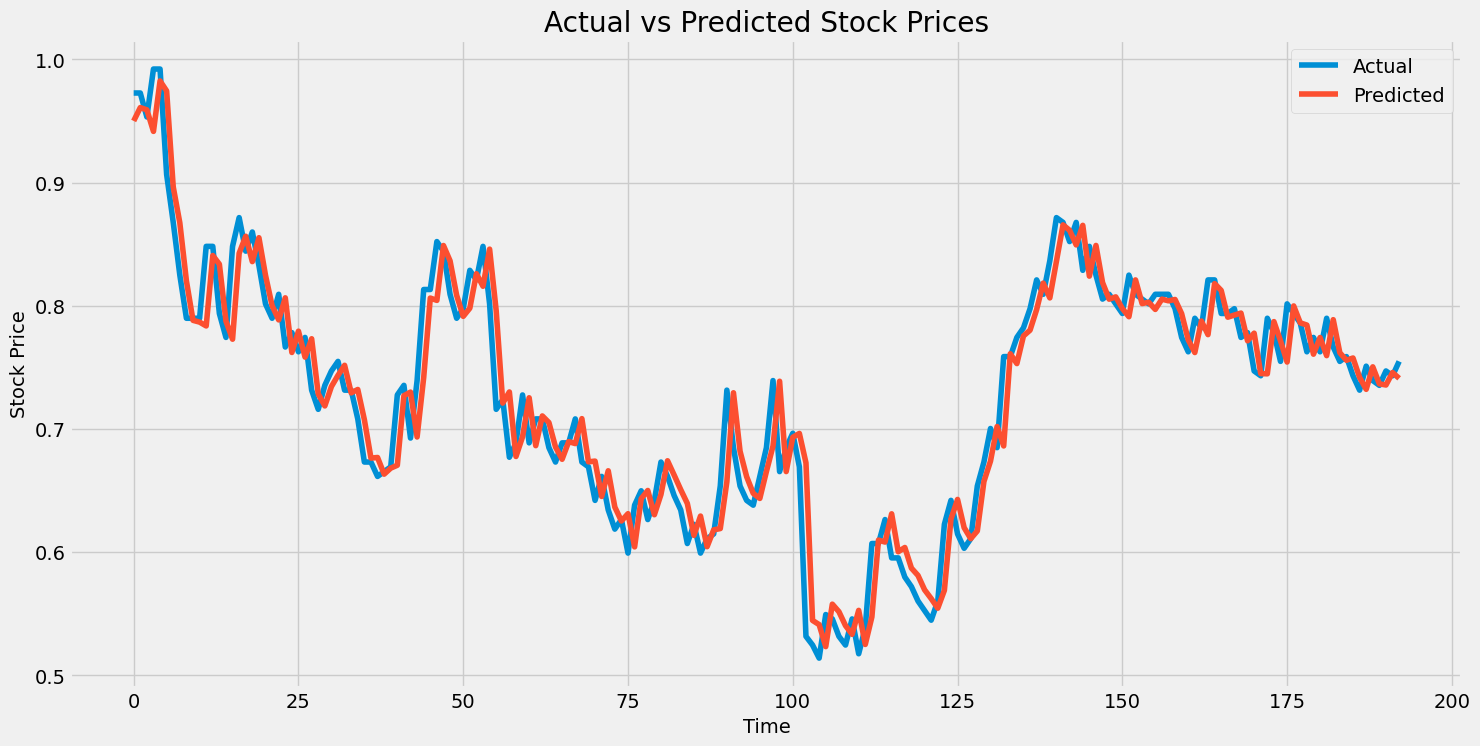

In [28]:
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [29]:
# save model
model.save('BBRI.h5')

In [30]:
# load model
loaded_model = load_model('BBRI.h5')